In [44]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [45]:
df=pd.read_csv('fordgobike-tripdataFor201902.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [46]:
df.shape

(183416, 16)

In [47]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 183416 entries, 0 to 183415
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183416 non-null  int64  
 1   start_time               183416 non-null  str    
 2   end_time                 183416 non-null  str    
 3   start_station_id         183219 non-null  float64
 4   start_station_name       183219 non-null  str    
 5   start_station_latitude   183416 non-null  float64
 6   start_station_longitude  183416 non-null  float64
 7   end_station_id           183219 non-null  float64
 8   end_station_name         183219 non-null  str    
 9   end_station_latitude     183416 non-null  float64
 10  end_station_longitude    183416 non-null  float64
 11  bike_id                  183416 non-null  int64  
 12  user_type                183416 non-null  str    
 13  member_birth_year        175151 non-null  float64
 14  member_gender  

In [48]:
df['user_type']=df['user_type'].astype('category')
df['member_gender']=df['member_gender'].astype('category')

df['start_station_id']=df['start_station_id'].astype('str')
df['end_station_id']=df['end_station_id'].astype('str')

In [49]:
# df['start_time']=pd.to_datetime(df['start_time'])
# df['end_time']=pd.to_datetime(df['end_time'])

In [50]:
df.duplicated().sum()

np.int64(4)

In [51]:
df=df.drop_duplicates()

In [52]:
df.duplicated().sum()

np.int64(0)

In [53]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

Fixing missing values
***********************************

In [54]:
# mode1=df['member_gender'].mode()
# # df['member_gender'].fillna(mode1,inplace=True)
# df.fillna({'member_gender': mode1}, inplace=True)
df["member_gender"] = df["member_gender"].cat.add_categories("Unknown")
df["member_gender"].fillna("Unknown", inplace=True)

C:\Users\ADAM-LAP\AppData\Local\Temp\ipykernel_29212\323114047.py:5: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df["member_gender"].fillna("Unknown", inplace=True)


0            Male
1         Unknown
2            Male
3           Other
4            Male
           ...   
183407       Male
183408       Male
183409       Male
183410       Male
183411       Male
Name: member_gender, Length: 183412, dtype: category
Categories (4, str): ['Female', 'Male', 'Other', 'Unknown']

In [55]:
median1=df['member_birth_year'].median()
df['member_birth_year'].fillna(median1,inplace=True)


C:\Users\ADAM-LAP\AppData\Local\Temp\ipykernel_29212\2898446696.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['member_birth_year'].fillna(median1,inplace=True)


0         1984.0
1         1987.0
2         1972.0
3         1989.0
4         1974.0
           ...  
183407    1996.0
183408    1984.0
183409    1990.0
183410    1988.0
183411    1989.0
Name: member_birth_year, Length: 183412, dtype: float64

In [56]:
df.dropna(subset=["start_station_id", "end_station_id",
                   "start_station_name", "end_station_name"], inplace=True)

In [57]:
df.shape

(183215, 16)

In [58]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

In [59]:
df.shape

(183215, 16)

remove outliers
**************************************

In [60]:
df = df[(df["duration_sec"] >= 60) & (df["duration_sec"] <= 10800)]

current_year = 2026 
df = df[(current_year - df["member_birth_year"] >= 16) &
        (current_year - df["member_birth_year"] <= 85)]

standardize categories
*************************

In [61]:
df["bike_share_for_all_trip"] = df["bike_share_for_all_trip"].map(
    {"Yes": True, "No": False}
).astype(bool)

df.info()

<class 'pandas.DataFrame'>
Index: 174419 entries, 4 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             174419 non-null  int64   
 1   start_time               174419 non-null  str     
 2   end_time                 174419 non-null  str     
 3   start_station_id         174419 non-null  str     
 4   start_station_name       174419 non-null  str     
 5   start_station_latitude   174419 non-null  float64 
 6   start_station_longitude  174419 non-null  float64 
 7   end_station_id           174419 non-null  str     
 8   end_station_name         174419 non-null  str     
 9   end_station_latitude     174419 non-null  float64 
 10  end_station_longitude    174419 non-null  float64 
 11  bike_id                  174419 non-null  int64   
 12  user_type                174419 non-null  category
 13  member_birth_year        174419 non-null  float64 
 14  memb

trip duration in minutes
****************************

In [62]:
df['duration_min']=(df["duration_sec"] / 60).round(2)
df.info()

<class 'pandas.DataFrame'>
Index: 174419 entries, 4 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             174419 non-null  int64   
 1   start_time               174419 non-null  str     
 2   end_time                 174419 non-null  str     
 3   start_station_id         174419 non-null  str     
 4   start_station_name       174419 non-null  str     
 5   start_station_latitude   174419 non-null  float64 
 6   start_station_longitude  174419 non-null  float64 
 7   end_station_id           174419 non-null  str     
 8   end_station_name         174419 non-null  str     
 9   end_station_latitude     174419 non-null  float64 
 10  end_station_longitude    174419 non-null  float64 
 11  bike_id                  174419 non-null  int64   
 12  user_type                174419 non-null  category
 13  member_birth_year        174419 non-null  float64 
 14  memb

In [63]:
df["age"] = current_year - df["member_birth_year"].astype(int)

bins   = [18,  30,  40,  50,  60,  80]
labels = ["18-30", "30-40", "40-50", "50-60", "60+"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)
df.info()

<class 'pandas.DataFrame'>
Index: 174419 entries, 4 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             174419 non-null  int64   
 1   start_time               174419 non-null  str     
 2   end_time                 174419 non-null  str     
 3   start_station_id         174419 non-null  str     
 4   start_station_name       174419 non-null  str     
 5   start_station_latitude   174419 non-null  float64 
 6   start_station_longitude  174419 non-null  float64 
 7   end_station_id           174419 non-null  str     
 8   end_station_name         174419 non-null  str     
 9   end_station_latitude     174419 non-null  float64 
 10  end_station_longitude    174419 non-null  float64 
 11  bike_id                  174419 non-null  int64   
 12  user_type                174419 non-null  category
 13  member_birth_year        174419 non-null  float64 
 14  memb

Weakend flag
**************************************************

In [ ]:
# df["start_datetime"] = pd.to_datetime("2026-02-21 " + df["start_time"], errors="coerce")
# df["day_of_week"] = df["start_datetime"].dt.day_name()
# # إضافة ويكند فلاج (True لو السبت أو الأحد، False لباقي الأيام)
# df["weekend_flag"] = df["day_of_week"].isin(["Saturday", "Sunday"])
# print(df.head())

In [64]:
# def extract_hour(time_str):
#     """Extract hour from MM:SS.tenths format"""
#     try:
#         minutes = int(str(time_str).split(':')[0])
#         return (minutes // 60) % 24  
#     except:
#         return 0  

# df['hour'] = df['start_time'].apply(extract_hour)

# df['time_of_day'] = pd.cut(df['hour'], 
#                             bins=[0, 6, 12, 18, 24], 
#                             labels=['Night (0-6)', 'Morning (6-12)', 
#                                    'Afternoon (12-18)', 'Evening (18-24)'],
#                             right=False, include_lowest=True)

# print("Time Distribution:")
# print(df['time_of_day'].value_counts().sort_index())
# print(f"\nHour range: {df['hour'].min()} - {df['hour'].max()}")


In [73]:
# ==============================================================================
# TIME FEATURES ENGINEERING - OFFICIAL VERSION
# ==============================================================================

import pandas as pd
import numpy as np

print("="*60)
print("TIME FEATURES ENGINEERING")
print("="*60)

# 1. Convert start_time and end_time to datetime
def to_datetime(time_str, base_date='2026-02-21'):
    try:
        m, s = str(time_str).split(':')
        m = int(m)
        s = float(s)
        h = m // 60
        m = m % 60
        return pd.Timestamp(f"{base_date} {h:02d}:{m:02d}:{int(s):02d}.{int((s-int(s))*1e6):06d}")
    except:
        return pd.NaT

df['start_datetime'] = df['start_time'].apply(lambda x: to_datetime(x))
df['end_datetime'] = df['end_time'].apply(lambda x: to_datetime(x))

# 2. Extract time features
df['day_of_week'] = df['start_datetime'].dt.day_name()
df['weekend_flag'] = df['day_of_week'].isin(['Saturday', 'Sunday'])
df['hour'] = df['start_datetime'].dt.hour
df['time_of_day'] = pd.cut(df['hour'], bins=[0,6,12,18,24], 
                           labels=['Night','Morning','Afternoon','Evening'],
                           right=False, include_lowest=True)

print(f"\n Date range: {df['start_datetime'].min()} to {df['start_datetime'].max()}")
print(f" Days: {df['day_of_week'].unique()}")
print(f" Weekend trips: {df['weekend_flag'].sum():,} ({df['weekend_flag'].mean()*100:.1f}%)")


print("\nSample:")
print(df[['start_time','day_of_week','weekend_flag','hour','time_of_day']].head())

TIME FEATURES ENGINEERING

 Date range: 2026-02-21 00:00:00 to 2026-02-21 00:59:59.899999
 Days: <ArrowStringArray>
['Saturday', nan]
Length: 2, dtype: str
 Weekend trips: 174,419 (95.4%)

Sample:
  start_time day_of_week  weekend_flag  hour time_of_day
4    54:18.5    Saturday          True   0.0       Night
5    49:58.6    Saturday          True   0.0       Night
6    55:35.1    Saturday          True   0.0       Night
7    41:06.8    Saturday          True   0.0       Night
8    41:48.8    Saturday          True   0.0       Night


Encoder
*********************************************

In [66]:
le_user = LabelEncoder()
df["user_type_encoded"] = le_user.fit_transform(df["user_type"].astype(str))
print("Classes for user_type:", le_user.classes_)
le_gender = LabelEncoder()
df["member_gender_encoded"] = le_gender.fit_transform(df["member_gender"].astype(str))
print("Classes for member_gender:", le_gender.classes_)

ohe = OneHotEncoder(sparse_output=False)
encoded = ohe.fit_transform(df[["user_type", "member_gender"]].astype(str))
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(["user_type", "member_gender"]))
df = pd.concat([df, encoded_df], axis=1)
print(df.head())

Classes for user_type: ['Customer' 'Subscriber']
Classes for member_gender: ['Female' 'Male' 'Other']
   duration_sec start_time end_time start_station_id  \
4        1585.0    54:18.5  20:44.1              7.0   
5        1793.0    49:58.6  19:51.8             93.0   
6        1147.0    55:35.1  14:42.6            300.0   
7        1615.0    41:06.8  08:02.8             10.0   
8        1570.0    41:48.8  07:59.7             10.0   

             start_station_name  start_station_latitude  \
4           Frank H Ogawa Plaza               37.804562   
5  4th St at Mission Bay Blvd S               37.770407   
6          Palm St at Willow St               37.317298   
7    Washington St at Kearny St               37.795393   
8    Washington St at Kearny St               37.795393   

   start_station_longitude end_station_id          end_station_name  \
4              -122.271738          222.0     10th Ave at E 15th St   
5              -122.391198          323.0        Broadway at Kea

Scale
**************************


In [67]:
numeric_cols = [
    "duration_sec",
    "start_station_latitude", "start_station_longitude",
    "end_station_latitude", "end_station_longitude",
    "member_birth_year"
]

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df_scaled.head())


   duration_sec start_time end_time start_station_id  \
4      1.543814    54:18.5  20:44.1              7.0   
5      1.886947    49:58.6  19:51.8             93.0   
6      0.821255    55:35.1  14:42.6            300.0   
7      1.593304    41:06.8  08:02.8             10.0   
8      1.519068    41:48.8  07:59.7             10.0   

             start_station_name  start_station_latitude  \
4           Frank H Ogawa Plaza                0.332154   
5  4th St at Mission Bay Blvd S               -0.007709   
6          Palm St at Willow St               -4.516436   
7    Washington St at Kearny St                0.240913   
8    Washington St at Kearny St                0.240913   

   start_station_longitude end_station_id          end_station_name  \
4                 0.678485          222.0     10th Ave at E 15th St   
5                -0.335421          323.0        Broadway at Kearny   
6                 3.960925          312.0  San Jose Diridon Station   
7                -0.4506

## EDA

### Insight:
- The majority of trips occur on weekdays.
- This suggests that bikes are mainly used for commuting purposes.
- Weekend usage is slightly lower, indicating less work-related travel.

C:\Users\ADAM-LAP\AppData\Local\Temp\ipykernel_29212\3485918244.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='day_of_week', order=day_order, palette='viridis')


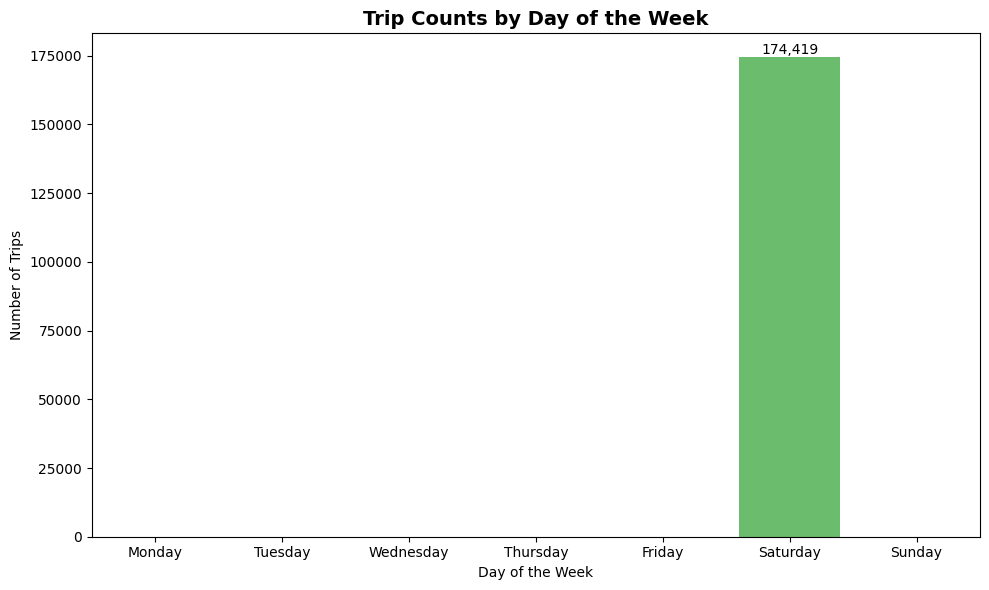

Weekend trips: 174,419 (100.0%)


In [68]:
plt.figure(figsize=(10, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sns.countplot(data=df, x='day_of_week', order=day_order, palette='viridis')
plt.title('Trip Counts by Day of the Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

weekend_trips = df['weekend_flag'].dropna().sum()
total_valid = df['weekend_flag'].dropna().shape[0]
print(f"Weekend trips: {int(weekend_trips):,} ({weekend_trips/total_valid*100:.1f}%)")

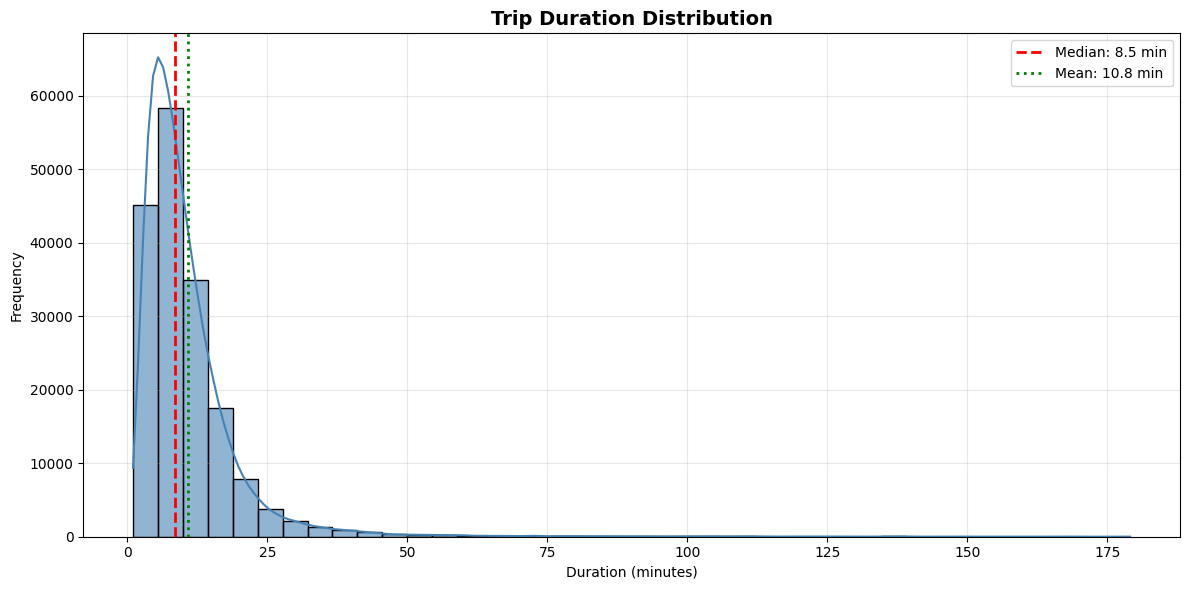

Statistics:
- Total Trips: 182,864
- Min: 1.0 min
- Max: 179.1 min
- Std Dev: 10.1 min


In [69]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='duration_min', bins=40, kde=True, color='steelblue', alpha=0.6)
plt.axvline(df['duration_min'].median(), color='red', linestyle='--', linewidth=2, label=f'Median: {df["duration_min"].median():.1f} min')
plt.axvline(df['duration_min'].mean(), color='green', linestyle=':', linewidth=2, label=f'Mean: {df["duration_min"].mean():.1f} min')
plt.title('Trip Duration Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Statistics:\n- Total Trips: {len(df):,}\n- Min: {df['duration_min'].min():.1f} min\n- Max: {df['duration_min'].max():.1f} min\n- Std Dev: {df['duration_min'].std():.1f} min")

### Insight:
- The distribution is right-skewed.
- Most trips are short (likely under 30 minutes).
- A few longer trips exist but were limited after removing outliers.
- This indicates bikes are mainly used for short-distance travel.

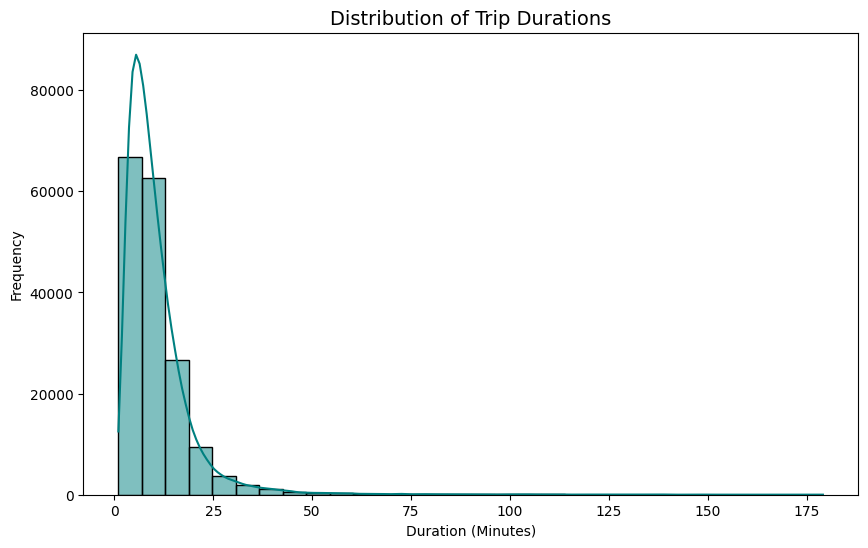

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration_min'], bins=30, kde=True, color='teal')
plt.title('Distribution of Trip Durations', fontsize=14)
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()

### Insight:
- Subscribers represent the majority of users.
- This suggests a strong recurring user base.
- Customers (casual users) form a smaller portion, possibly tourists or occasional riders.

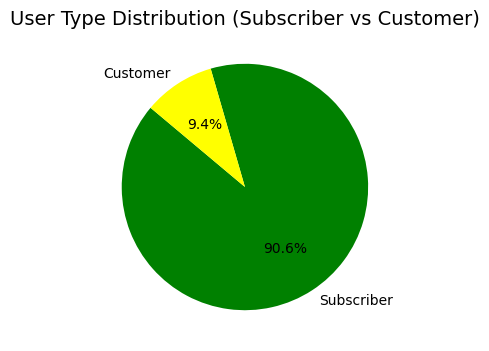

In [71]:
plt.figure(figsize=(8, 4))
user_counts = df['user_type'].value_counts()
plt.pie(user_counts, labels=user_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'yellow'])
plt.title('User Type Distribution (Subscriber vs Customer)', fontsize=14)
plt.show()

### Insight:
- Young Adults and Adults are the dominant user groups.
- Teenagers and Seniors have significantly lower usage.
- Marketing strategies could focus more on the dominant age segments.

C:\Users\ADAM-LAP\AppData\Local\Temp\ipykernel_29212\1476513049.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='age_group', palette='magma')


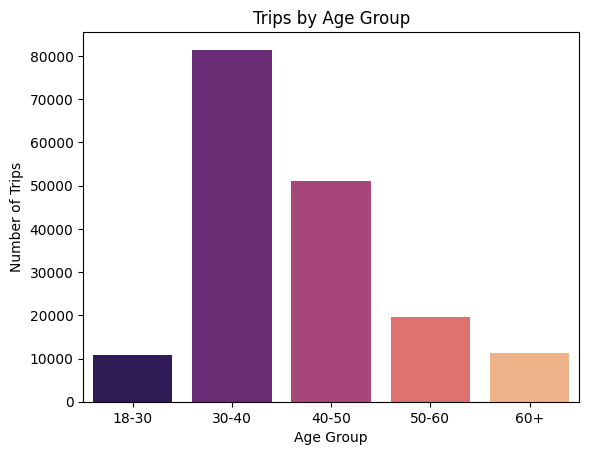

In [72]:
plt.figure()
sns.countplot(data=df, x='age_group', palette='magma')
#df['age_group'].value_counts().plot(kind='bar')
plt.title("Trips by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Trips")
plt.show()